In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
import matplotlib.pyplot as plt
import matplotlib.patches as  mpatches

from itertools import chain
from pathlib import Path
# import seaborn as sns
import pandas as pd 
import numpy as np
import torch
import json
# import umap
import os
from tqdm.notebook import tqdm

from sklearn import metrics

/home/gayane/miniconda3/envs/cptm/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
dataset_name_list = ["BBBP", "clintox_0", "BACE", "Tox21", "SIDER_0", "Genotoxicity", "esol", "lipo", "ZINC"] 


In [4]:
path = "/mnt/good/gayane/data/data_load_folder"

In [5]:
Xs = []
for dn in dataset_name_list:
    np_filename = f'{path}/np_{dn}_pretrainedTrue.npy'
    Xs.append(np.load(np_filename).reshape(-1, 1024))


In [6]:
len(Xs)

9

In [7]:
for dn, X in zip(dataset_name_list, Xs):
    print(dn, X.shape)

BBBP (2039, 1024)
clintox_0 (1478, 1024)
BACE (1513, 1024)
Tox21 (7831, 1024)
SIDER_0 (1427, 1024)
Genotoxicity (641, 1024)
esol (1128, 1024)
lipo (4200, 1024)
ZINC (475196, 1024)


In [24]:
metric = 'cosine'
r = (0, 0.8)
rmin = (0, 0.5)

# metric = 'euclidean'
# r = (0, 40)
# r = (0, 25)

In [8]:
distances = {}
for i in range(len(dataset_name_list) - 1):
    print(f"{i} is starting...", end='')
    distances[i] = {}
    for j in range(len(dataset_name_list)):
        print(f"{j} ", end='')
        distances[i][j] = metrics.pairwise_distances(Xs[i], Xs[j], metric=metric)
    print(" ")

0 is starting...0 1 2 3 4 5 6 7 8  
1 is starting...0 1 2 3 4 5 6 7 8  
2 is starting...0 1 2 3 4 5 6 7 8  
3 is starting...0 1 2 3 4 5 6 7 8  
4 is starting...0 1 2 3 4 5 6 7 8  
5 is starting...0 1 2 3 4 5 6 7 8  
6 is starting...0 1 2 3 4 5 6 7 8  
7 is starting...0 1 2 3 4 5 6 7 8  


In [26]:
histograms = {}
for i in range(len(dataset_name_list) - 1):
    print(i, end=' ')
    histograms[i] = {}
    for j in range(len(dataset_name_list)):
        histograms[i][j], x_ = np.histogram(distances[i][j], bins=50, range=r, density=True)

0 1 2 3 4 5 6 7 

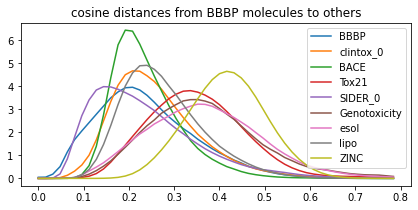

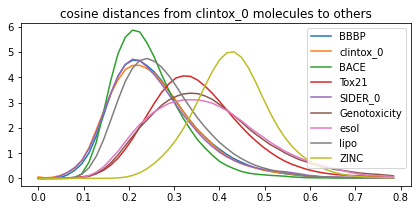

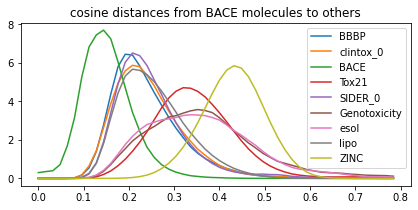

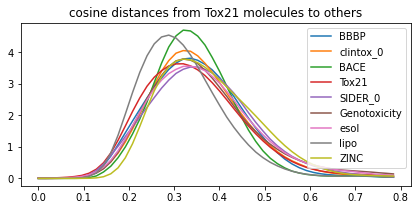

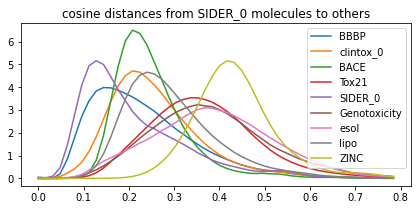

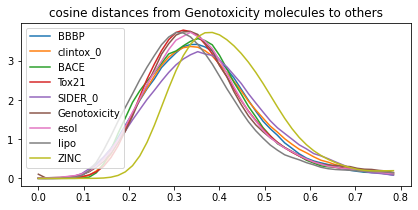

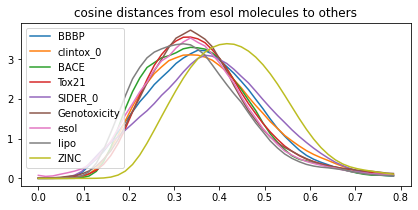

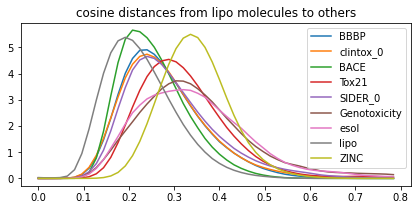

In [27]:
for i, dn in enumerate(dataset_name_list[:-1]):
    plt.figure(figsize=(7,3))
    for j in range(len(dataset_name_list)):
        plt.plot(x_[:-1], histograms[i][j], label=dataset_name_list[j])
    plt.legend()
    plt.title(f"{metric} distances from {dn} molecules to others");

In [37]:

for i in range(len(dataset_name_list) - 1):
    for t in range(len(distances[i][i])):
        distances[i][i][t,t] = 200

In [41]:
min_histograms = {}
for i in range(len(dataset_name_list) - 1):
    print(i, end=' ')
    min_histograms[i] = {}
    for j in range(len(dataset_name_list)):
        min_histograms[i][j], x_ = np.histogram(distances[i][j].min(axis=1), bins=30, range=rmin, density=True)

0 1 2 3 4 5 6 7 

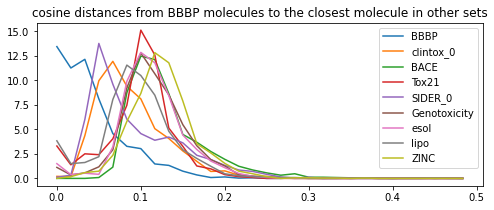

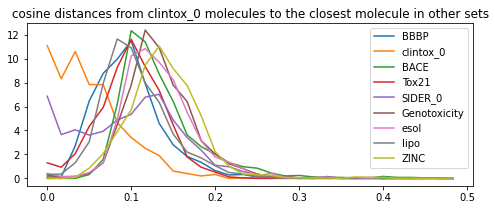

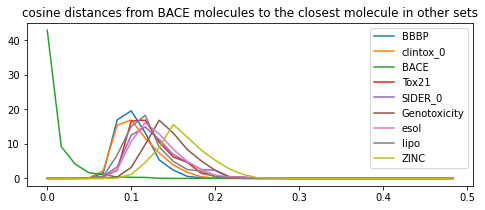

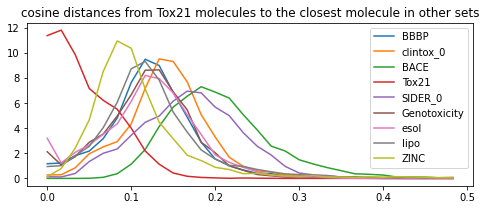

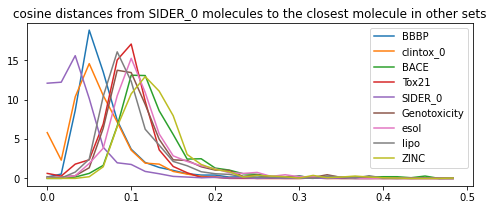

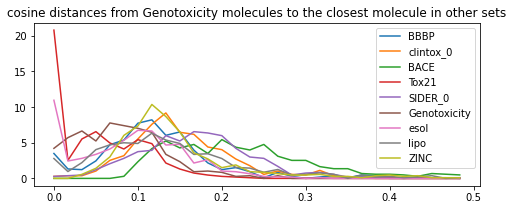

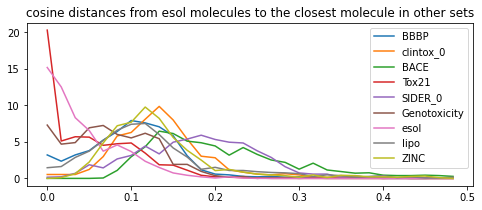

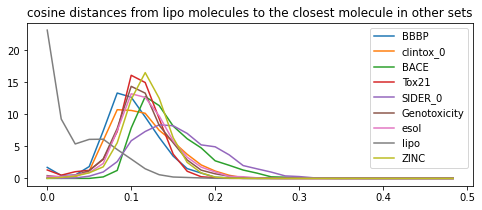

In [42]:
for i, dn in enumerate(dataset_name_list[:-1]):
    plt.figure(figsize=(8, 3))
    for j in range(len(dataset_name_list)):
#         if i == j:
#             continue
        plt.plot(x_[:-1], min_histograms[i][j], label=dataset_name_list[j])
    plt.legend()
    plt.title(f"{metric} distances from {dn} molecules to the closest molecule in other sets");



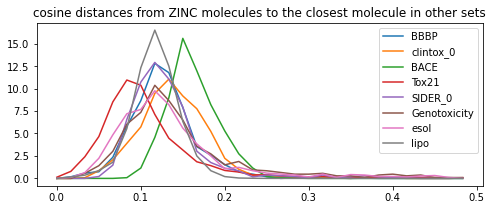

In [43]:
plt.figure(figsize=(8, 3))
for i in range(len(dataset_name_list) - 1):
    plt.plot(x_[:-1], min_histograms[i][8], label=dataset_name_list[i])
plt.legend()
plt.title(f"{metric} distances from ZINC molecules to the closest molecule in other sets");



In [ ]:

# fig, ax = plt.subplots(9, 9, figsize=(15,15))
# for i in range(9):
#     for j in range(9):
#         ax[i][j].hist(distances[i][j].flatten(), bins=100);
#         ax[i][j].set_xlim(0, 40)

In [ ]:
distances[0][0]